# Checking for Normality in Survey Data – Code‑Along Assignment

## Scenario
You work as a data analyst for a research firm that just finished a large public‑opinion study.
The firm collected two kinds of measurements:

* **Exam scores** from a standardized training program (expected to be roughly normal).
* **Survey completion times** in minutes for an online questionnaire (often skewed).

Before running any statistical tests such as a **t‑test**, you must confirm whether each
variable follows a normal distribution. In this assignment you will:

1. Explore a CSV file that contains the data.
2. Use visual tools (histogram, box plot, Q‑Q plot) to assess normality.
3. Decide which statistical test is appropriate.

## Setup and Initial Inspection

Download the file **`normality_check_data.csv`** and place it in the same folder as this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('data/normality_check_data.csv')
df.head()

,exam_score,survey_time
0,79.967142,5.402733
1,73.617357,2.511673
2,81.476885,1.276804
3,90.230299,4.119086
4,72.658466,28.631211


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exam_score   100 non-null    float64
 1   survey_time  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [3]:
df.describe()

,exam_score,survey_time
count,100.000000,100.000000
mean,73.961535,9.399814
std,9.081684,9.056003
min,48.802549,0.050744
25%,68.990943,2.761229
50%,73.730437,7.080751
75%,79.059521,11.865082
max,93.522782,42.440370


### Questions:

* How many observations are there? 5
* Are any columns missing data? No
* Based on `.describe()`, which variable seems more spread out? The exam_score

## Part 1: Histogram Comparison

Histograms reveal the general shape of each distribution.

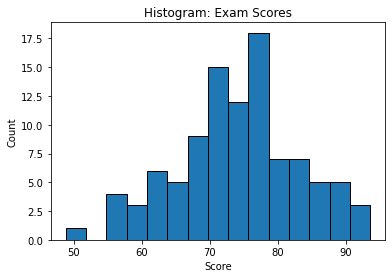

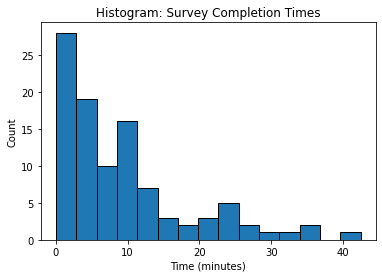

In [4]:
# Histogram for exam scores
plt.hist(df['exam_score'], bins=15, edgecolor='black')
plt.title('Histogram: Exam Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Histogram for survey completion times
plt.hist(df['survey_time'], bins=15, edgecolor='black')
plt.title('Histogram: Survey Completion Times')
plt.xlabel('Time (minutes)')
plt.ylabel('Count')
plt.show()

### Questions:

* Which histogram looks more symmetric and bell‑shaped? Histogram: Exam Scores
* Which histogram has a long tail? Histogram: Survey Completion Times
* How does this support or contradict your expectations from the scenario? The exam scores follows a binomial distribution.

## Part 2: Box Plot Comparison

Box plots help you detect outliers and gauge symmetry.

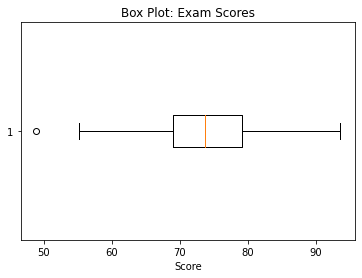

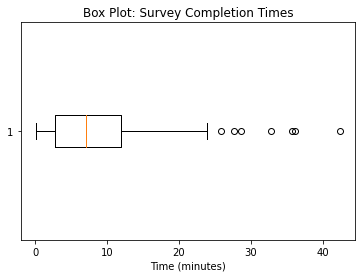

In [5]:
# Box plot for exam scores
plt.boxplot(df['exam_score'], vert=False)
plt.title('Box Plot: Exam Scores')
plt.xlabel('Score')
plt.show()

# Box plot for survey completion times
plt.boxplot(df['survey_time'], vert=False)
plt.title('Box Plot: Survey Completion Times')
plt.xlabel('Time (minutes)')
plt.show()

### Questions:

* Are the whiskers of each box plot roughly equal in length? No. 
* Which box plot shows potential outliers? The Box Plot: Survey Completion Times.
* How do these findings align with the histograms? This finding aligns with the results of the survey completion times histogram.

## Part 3: Q‑Q Plot Comparison

A Q‑Q plot compares the quantiles of your data to the quantiles of a normal distribution.

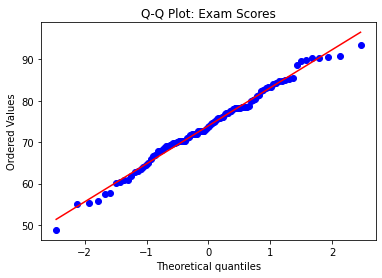

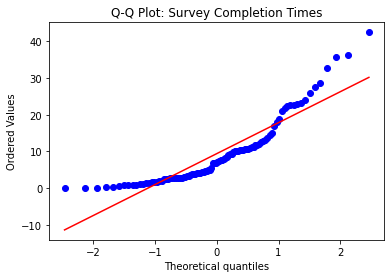

In [6]:
# Q‑Q plot for exam scores
stats.probplot(df['exam_score'], dist='norm', plot=plt)
plt.title('Q‑Q Plot: Exam Scores')
plt.show()

# Q‑Q plot for survey completion times
stats.probplot(df['survey_time'], dist='norm', plot=plt)
plt.title('Q‑Q Plot: Survey Completion Times')
plt.show()

### Questions:

* Do the points for exam scores follow the reference line closely? Yes. 
* Do the points for survey times curve away from the line at either end? Yes, at both ends.
* What do these patterns indicate about normality? There is a linear relationship in the exam scores Q Q plot.

## Part 4: Interpretation and Decision

### Questions:

* Which variable appears approximately normal? The Exam Scores.
* Is a **t‑test** appropriate for both variables? Explain. I believe it is appropriate as the t-test can evaluate the mean of one or two populations. 
* Suggest a better alternative test for the non‑normal variable (if any). z-Scores.

## Part 5: Bonus – Running a T‑Test Anyway

In [7]:
# Create comparison samples
exam_score_new  = df['exam_score'] + 3          # shift mean upward
survey_time_new = df['survey_time'] * 1.1       # increase mean by 10 %

# Two‑sample t‑tests
print('T‑test on Exam Scores:')
print(stats.ttest_ind(df['exam_score'], exam_score_new))

print('\nT‑test on Survey Times:')
print(stats.ttest_ind(df['survey_time'], survey_time_new))

T‑test on Exam Scores:
Ttest_indResult(statistic=-2.3358226052991804, pvalue=0.02050121220414108)

T‑test on Survey Times:
Ttest_indResult(statistic=-0.6982108445022693, pvalue=0.4858645320788689)


### Questions:

* Does the exam‑score t‑test produce a significant p‑value?  Does this agree with your normality conclusion?
* Would you trust the survey‑time t‑test result? Why or why not?
* How could non‑normality distort the Type I error rate or confidence interval?

## Recap

**You have now:**

* Loaded real data from a CSV and inspected it with `.head()`, `.info()`, and `.describe()`.
* Visualized each variable with histograms, box plots, and Q‑Q plots.
* Interpreted visual evidence to judge normality.
* Discussed why normality matters for a t‑test and explored what happens when the assumption is violated.

## Deliverables

1. **Jupyter Notebook** that includes:
   * Code cells for loading and exploring the CSV file.
   * Plotting code for all three visual checks.
   * Written answers beneath each “Questions” section.
   * A final paragraph summarizing whether a t‑test is valid for each variable and what you learned.
